# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2383 Ноздрин Василий Ярославович и Плюсов Даниил Александрович. Вариант №10.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.  

## Основные теоретические положения

Рассматривается дискретный временной ряд $s_n$ с единичным шагом дискретизации.

### Квадратурные формулы численного интегрирования

Численное интегрирование представляет собой приближенное вычисление интеграла:
$$y(t) = \int_0^t x(\tau)d\tau$$

где $x(t)$ - входной сигнал, $y(t)$ - результат интегрирования.

#### Основные квадратурные формулы:

**Формула прямоугольников (явная):**
$$y_{n+1} = y_n + x_n, \quad y_0 = 0$$

**Формула прямоугольников (неявная):**
$$y_{n+1} = y_n + x_{n+1}, \quad y_0 = 0$$

**Формула трапеций:**
$$y_{n+1} = y_n + \frac{1}{2}(x_n + x_{n+1}), \quad y_0 = 0$$

**Формула Симпсона:**
$$y_{n+1} = y_{n-1} + \frac{1}{3}(x_{n-1} + 4x_n + x_{n+1}), \quad y_0 = 0$$

**Формула для интегрирования по «правилу 3/8»:**
$$y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$

### Частотное представление сигналов

Любой дискретный сигнал может быть представлен как суперпозиция комплексных экспонент:
$$x_n = \sum_{m=1}^{M} c_m e^{i\omega_m n}$$

где $\omega_m = 2\pi f_m$ - круговая частота, связанная с циклической частотой $f_m$.

### Передаточная функция фильтра

Для линейного рекурсивного фильтра выходной сигнал выражается через входной с использованием передаточной функции:
$$y_n = \sum_{m=1}^M c_m H(\omega_m)e^{i\omega_m n}$$

где $H(\omega)$ - передаточная функция фильтра, характеризующая его частотные свойства.

### Получение передаточных функций

Передаточные функции получаются с помощью Z-преобразования разностных уравнений. Для рекурсивных фильтров передаточная функция имеет вид:
$$H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{k=0}^{M} b_k z^{-k}}{1 - \sum_{k=1}^{N} a_k z^{-k}}$$

где $a_k$, $b_k$ - коэффициенты разностного уравнения.

### Частотная характеристика идеального интегратора

Для непрерывного интегратора передаточная функция:
$$H_{ideal}(\omega) = \frac{1}{j\omega}$$

### Оценка точности методов

Отношение вычисляемого значения к истинному:
$$\gamma(\omega) = \frac{H_{method}(\omega)}{H_{ideal}(\omega)}$$

### Логарифмическое представление АЧХ

Для анализа ослабления сигнала используется логарифмическая шкала в децибелах:
$$|H(\omega)|_{дБ} = 20\log_{10}|H(\omega)|$$

Соотношение между передаточными функциями для циклической и круговой частот:
$$\tilde{H}(f) = H(2\pi f) = H(\omega)$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики ~H(f). Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

Пункты работы выполняется с помощью кода.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

f_freq = np.linspace(0.001, 0.5, 1000)
w_freq = 2 * pi * f_freq

### 1. Передаточные функции рекурсивных фильтров, соответствующие квадратурным формулам прямоугольников, трапеций и Симпсона.


#### Квадратурная формула прямоугольников  

**Разностное уравнение:**  
$$y_{n+1} = y_n + x_n$$

**Вывод передаточной функции:**  
Для гармонического сигнала $x_n = e^{i\omega n}$, $y_n = H(\omega)e^{i\omega n}$:
$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + e^{i\omega n}$$
$$H(\omega)e^{i\omega} = H(\omega) + 1$$
$$H(\omega)(e^{i\omega} - 1) = 1$$
$$H(\omega) = \frac{1}{e^{i\omega} - 1} = \frac{1}{e^{i\omega/2}(e^{i\omega/2} - e^{-i\omega/2})} = \frac{e^{-i\omega/2}}{2i\sin(\omega/2)}$$

**Передаточная функция:**  
$$H_{rect}(\omega) = \frac{1}{2i\sin(\omega/2)}e^{-i\omega/2}$$

**Отношение к идеальному интегратору:**  
Идеальный интегратор: $H_{ideal}(\omega) = \frac{1}{i\omega}$
$$\gamma_{rect}(\omega) = \frac{H_{rect}(\omega)}{H_{ideal}(\omega)} = \frac{i\omega}{2i\sin(\omega/2)}e^{-i\omega/2} = \frac{\omega/2}{\sin(\omega/2)}e^{-i\omega/2}$$

#### Квадратурная формула трапеций

**Разностное уравнение:**  
$$y_{n+1} = y_n + \frac{1}{2}(x_n + x_{n+1})$$

**Вывод передаточной функции:**  
$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega(n+1)})$$
$$H(\omega)e^{i\omega} = H(\omega) + \frac{1}{2}(1 + e^{i\omega})$$
$$H(\omega)(e^{i\omega} - 1) = \frac{1}{2}(1 + e^{i\omega})$$
$$H(\omega) = \frac{1 + e^{i\omega}}{2(e^{i\omega} - 1)} = \frac{e^{i\omega/2}(e^{-i\omega/2} + e^{i\omega/2})}{2e^{i\omega/2}(e^{i\omega/2} - e^{-i\omega/2})} = \frac{\cos(\omega/2)}{2i\sin(\omega/2)}$$

**Передаточная функция:**  
$$H_{trap}(\omega) = \frac{\cos(\omega/2)}{2i\sin(\omega/2)}$$

**Отношение к идеальному интегратору:**  
$$\gamma_{trap}(\omega) = \frac{H_{trap}(\omega)}{H_{ideal}(\omega)} = \frac{i\omega\cos(\omega/2)}{2i\sin(\omega/2)} = \frac{\omega\cos(\omega/2)}{2\sin(\omega/2)}$$

#### Квадратурная формула Симпсона

**Разностное уравнение:**  
$$y_{n+1} = y_{n-1} + \frac{1}{3}(x_{n-1} + 4x_n + x_{n+1})$$

**Вывод передаточной функции:**  
$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega(n-1)} + \frac{1}{3}(e^{i\omega(n-1)} + 4e^{i\omega n} + e^{i\omega(n+1)})$$
$$H(\omega)e^{i\omega} = H(\omega)e^{-i\omega} + \frac{1}{3}(e^{-i\omega} + 4 + e^{i\omega})$$
$$H(\omega)(e^{i\omega} - e^{-i\omega}) = \frac{1}{3}(4 + 2\cos\omega)$$
$$H(\omega)(2i\sin\omega) = \frac{2}{3}(2 + \cos\omega)$$
$$H(\omega) = \frac{2 + \cos\omega}{3i\sin\omega}$$

**Передаточная функция:**  
$$H_{simp}(\omega) = \frac{2 + \cos\omega}{3i\sin\omega}$$

**Отношение к идеальному интегратору:**  
$$\gamma_{simp}(\omega) = \frac{H_{simp}(\omega)}{H_{ideal}(\omega)} = \frac{i\omega(2 + \cos\omega)}{3i\sin\omega} = \frac{\omega(2 + \cos\omega)}{3\sin\omega}$$

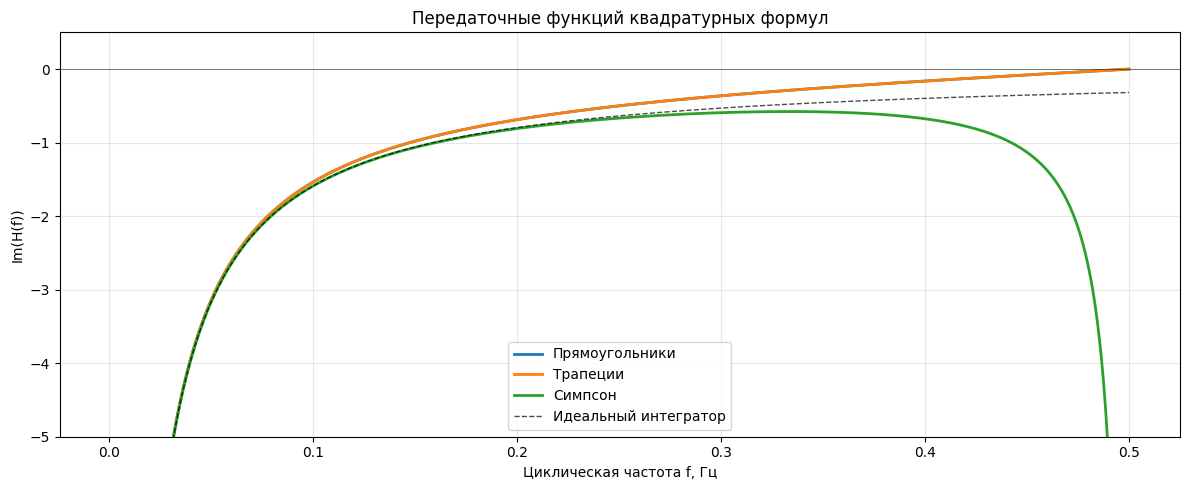

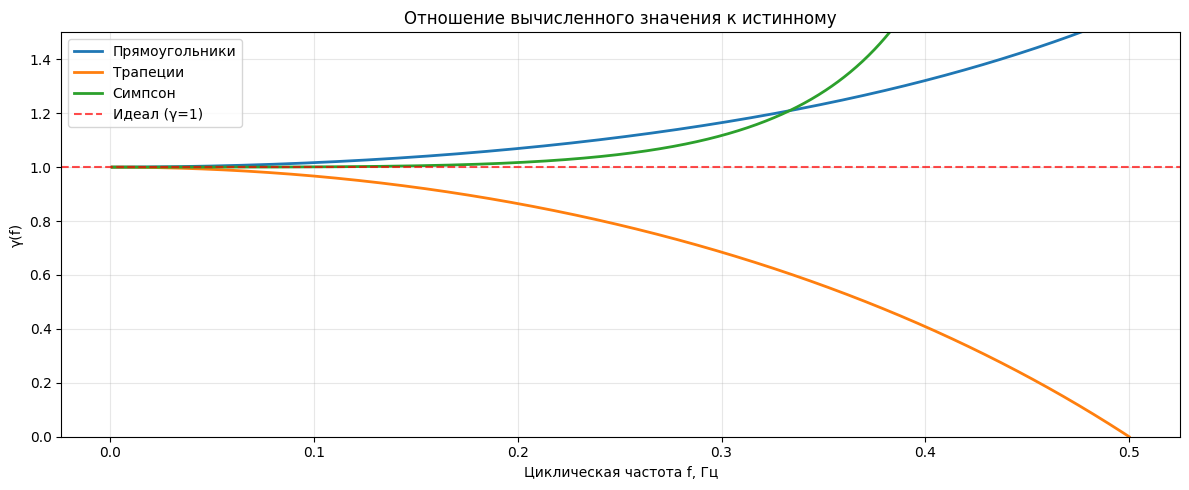

In [9]:
H_rect = np.exp(-1j * w_freq/2) / (2j * np.sin(w_freq/2))
H_trap = np.cos(w_freq/2) / (2j * np.sin(w_freq/2))
H_simp = (2 + np.cos(w_freq)) / (3j * np.sin(w_freq))

H_ideal = 1 / (1j * w_freq)

gamma_rect = np.abs(H_rect) / np.abs(H_ideal)
gamma_trap = np.abs(H_trap) / np.abs(H_ideal)
gamma_simp = np.abs(H_simp) / np.abs(H_ideal)

plt.figure(figsize=(12, 5))

plt.plot(f_freq, np.imag(H_rect), label='Прямоугольники', linewidth=2)
plt.plot(f_freq, np.imag(H_trap), label='Трапеции', linewidth=2)
plt.plot(f_freq, np.imag(H_simp), label='Симпсон', linewidth=2)
plt.plot(f_freq, np.imag(H_ideal), 'k--', label='Идеальный интегратор', linewidth=1, alpha=0.7)
plt.axhline(0, color='black', linewidth=0.7, alpha=0.5)
plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('Im(H(f))')
plt.title('Передаточные функций квадратурных формул')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-5, 0.5)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.plot(f_freq, gamma_rect, label='Прямоугольники', linewidth=2)
plt.plot(f_freq, gamma_trap, label='Трапеции', linewidth=2)
plt.plot(f_freq, gamma_simp, label='Симпсон', linewidth=2)
plt.axhline(1, color='red', linestyle='--', label='Идеал (γ=1)', alpha=0.7)
plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('γ(f)')
plt.title('Отношение вычисленного значения к истинному')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.5)

plt.tight_layout()
plt.show()

#### Интерпретация частотных свойств

На первом графике видно, что все три квадратурные формулы демонстрируют поведение, характерное для интеграторов: мнимая часть передаточной функции $Im(H(f))$ стремится к $-\infty$ при $f \to 0$. Это соответствует идеальному интегратору $H_{ideal}(\omega) = \frac{1}{i\omega}$, который имеет бесконечное усиление на постоянной составляющей сигнала. Все методы ведут себя как фильтры нижних частот, усиливая низкочастотные компоненты.

На втором графике отношения $\gamma(f)$ наблюдается, что все методы обеспечивают высокую точность интегрирования на низких частотах ($\gamma \approx 1$). Однако с ростом частоты точность методов снижается:

- **Формула прямоугольников** демонстрирует наиболее быстрое отклонение от идеала, что связано с использованием только одного значения функции на интервале интегрирования
- **Формула трапеций** показывает лучшую точность благодаря симметричному усреднению значений на границах интервала
- **Формула Симпсона** обеспечивает наивысшую точность в наиболее широкой полосе частот, что объясняется использованием квадратичной аппроксимации и трехточечной схемы

На высоких частотах ($f > 0.3$ Гц) все методы существенно искажают сигнал, причем формула Симпсона демонстрирует наиболее резкий спад точности, что соответствует ее более узкой эффективной полосе интегрирования.

### 2. Передаточная функция рекурсивного фильтра для интегрирования по «правилу 3/8».



#### Квадратурная формула по "правилу 3/8"

**Разностное уравнение:**  
$$y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$

**Вывод передаточной функции:**  
Для гармонического сигнала $x_n = e^{i\omega n}$, $y_n = H(\omega)e^{i\omega n}$:
$$H(\omega)e^{i\omega(n+2)} = H(\omega)e^{i\omega(n-1)} + \frac{1}{8}(e^{i\omega(n+2)} + 3e^{i\omega(n+1)} + 3e^{i\omega n} + e^{i\omega(n-1)})$$

Делим на $e^{i\omega n}$:  
$$H(\omega)e^{2i\omega} = H(\omega)e^{-i\omega} + \frac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$

$$H(\omega)(e^{2i\omega} - e^{-i\omega}) = \frac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$

$$H(\omega) = \frac{e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega}}{8(e^{2i\omega} - e^{-i\omega})}$$

Преобразуем числитель и знаменатель:  
$$H(\omega) = \frac{e^{i\omega/2}(e^{1.5i\omega} + 3e^{0.5i\omega} + 3e^{-0.5i\omega} + e^{-1.5i\omega})}{8e^{i\omega/2}(e^{1.5i\omega} - e^{-1.5i\omega})} = \frac{2\cos(1.5\omega) + 6\cos(0.5\omega)}{16i\sin(1.5\omega)}$$

**Передаточная функция:**  
$$H_{3/8}(\omega) = \frac{\cos(1.5\omega) + 3\cos(0.5\omega)}{8i\sin(1.5\omega)}$$

**Отношение к идеальному интегратору:**  
$$\gamma_{3/8}(\omega) = \frac{H_{3/8}(\omega)}{H_{ideal}(\omega)} = \frac{i\omega(\cos(1.5\omega) + 3\cos(0.5\omega))}{8i\sin(1.5\omega)} = \frac{\omega(\cos(1.5\omega) + 3\cos(0.5\omega))}{8\sin(1.5\omega)}$$

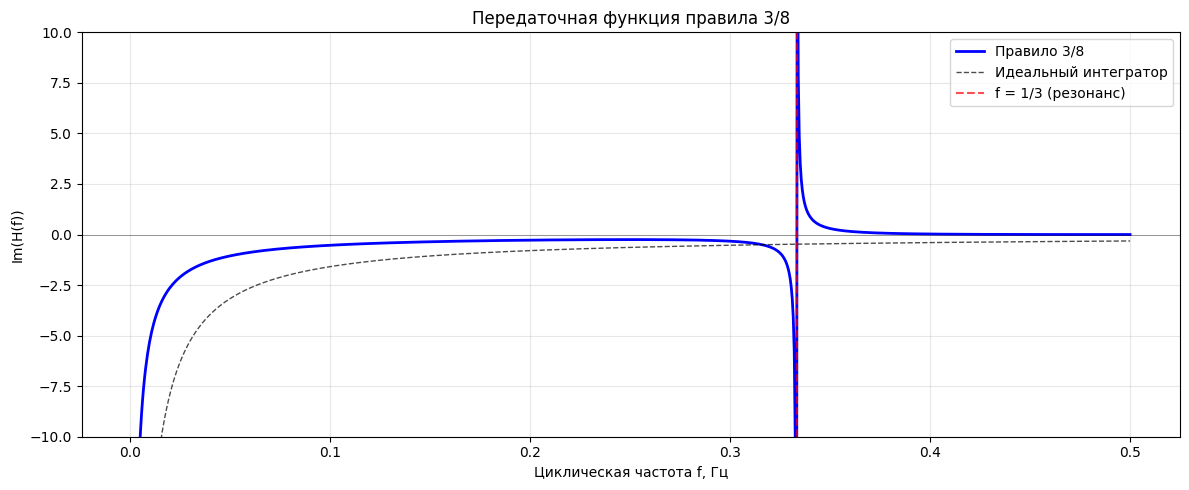

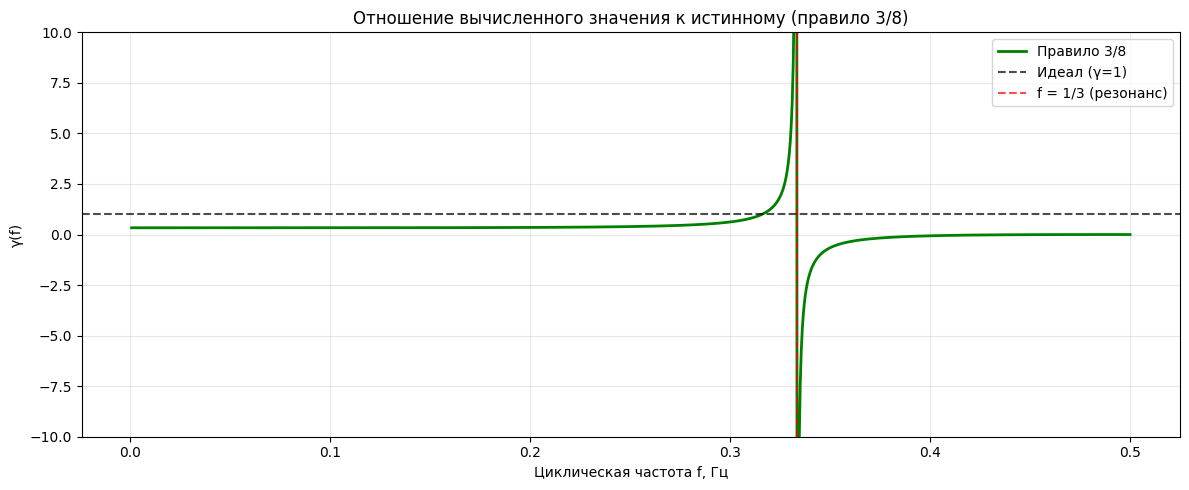

In [11]:
H_38 = (np.cos(1.5 * w_freq) + 3 * np.cos(0.5 * w_freq)) / (8j * np.sin(1.5 * w_freq))

gamma_38 = (w_freq * (np.cos(1.5 * w_freq) + 3 * np.cos(0.5 * w_freq))) / (8 * np.sin(1.5 * w_freq))

plt.figure(figsize=(12, 5))

plt.plot(f_freq, np.imag(H_38), 'b-', label='Правило 3/8', linewidth=2)
plt.plot(f_freq, np.imag(H_ideal), 'k--', label='Идеальный интегратор', linewidth=1, alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5, alpha=0.5)
plt.axvline(x=1/3, color='red', linestyle='--', label='f = 1/3 (резонанс)', alpha=0.7)
plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('Im(H(f))')
plt.title('Передаточная функция правила 3/8')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-10, 10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.plot(f_freq, gamma_38, 'g-', label='Правило 3/8', linewidth=2)
plt.axhline(1, color='black', linestyle='--', label='Идеал (γ=1)', alpha=0.7)
plt.axvline(x=1/3, color='red', linestyle='--', label='f = 1/3 (резонанс)', alpha=0.7)
plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('γ(f)')
plt.title('Отношение вычисленного значения к истинному (правило 3/8)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-10, 10)

plt.tight_layout()
plt.show()

#### Интерпретация частотных свойств

Передаточная функция правила 3/8 демонстрирует характерное для интеграторов поведение: мнимая часть $Im(H(f))$ стремится к $-\infty$ при $f \to 0$, что соответствует бесконечному усилению постоянной составляющей сигнала.

Особенностью данного метода является наличие **резонансной частоты** при $f = 1/3$ Гц, где знаменатель передаточной функции $\sin(1.5\omega)$ обращается в ноль. В окрестности этой частоты наблюдается резкий рост амплитуды, что может приводить к нестабильности фильтра при работе с сигналами, содержащими компоненты на данной частоте.

На графике отношения $\gamma(f)$ видно, что метод обеспечивает высокую точность интегрирования ($\gamma \approx 1$) в широкой полосе низких частот. Однако наличие резонансного пика ограничивает практическую применимость метода для сигналов со сложным спектральным составом.

По сравнению с предыдущими методами, правило 3/8 использует четыре точки для аппроксимации интеграла, что теоретически должно обеспечивать более высокую точность, но наличие резонансной особенности требует осторожности при практическом применении.

### 3. Передаточная функция нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам.


## Задание 3

### 3.1. Сопоставительный анализ частотных характеристик

Проведем сравнительный анализ всех четырех методов численного интегрирования: формул прямоугольников, трапеций, Симпсона и правила 3/8.

#### Общие свойства:
- **Все методы являются интеграторами нижних частот** - демонстрируют бесконечное усиление на нулевой частоте ($f \to 0$), что соответствует свойству идеального интегратора
- **Высокая точность на низких частотах** - все методы обеспечивают $\gamma \approx 1$ в области низких частот, что делает их пригодными для интегрирования медленно меняющихся сигналов

#### Сравнительные характеристики:

**Формула прямоугольников:**
- Наиболее простая реализация
- Наименее точная среди всех методов
- Быстрое отклонение от идеала с ростом частоты
- Устойчивая характеристика без резонансов

**Формула трапеций:**
- Улучшенная точность по сравнению с прямоугольниками
- Симметричная характеристика
- Широкая полоса точного интегрирования
- Устойчивая работа во всем частотном диапазоне

**Формула Симпсона:**
- Наивысшая точность среди классических методов
- Самая широкая полоса, где $\gamma \approx 1$ (до $f \approx 0.25$ Гц)
- Эффективное подавление высокочастотных компонентов
- Устойчивая характеристика

**Правило 3/8:**
- Теоретически высокая точность за счет использования четырех точек
- Наличие резонансной частоты при $f = 1/3$ Гц
- Потенциальная нестабильность при работе с сигналами, содержащими компоненты на резонансной частоте
- Ограниченная практическая применимость из-за резонансной особенности

#### Применение:

- **Для простых приложений** - формула трапеций (хороший баланс точности и простоты)
- **Для высокоточных вычислений** - формула Симпсона (наилучшая точность среди устойчивых методов)
- **Для образовательных целей** - формула прямоугольников (простота понимания)
- **Правило 3/8** - требует осторожности из-за резонансной особенности, может использоваться только при гарантированном отсутствии сигналов на частоте $f = 1/3$ Гц

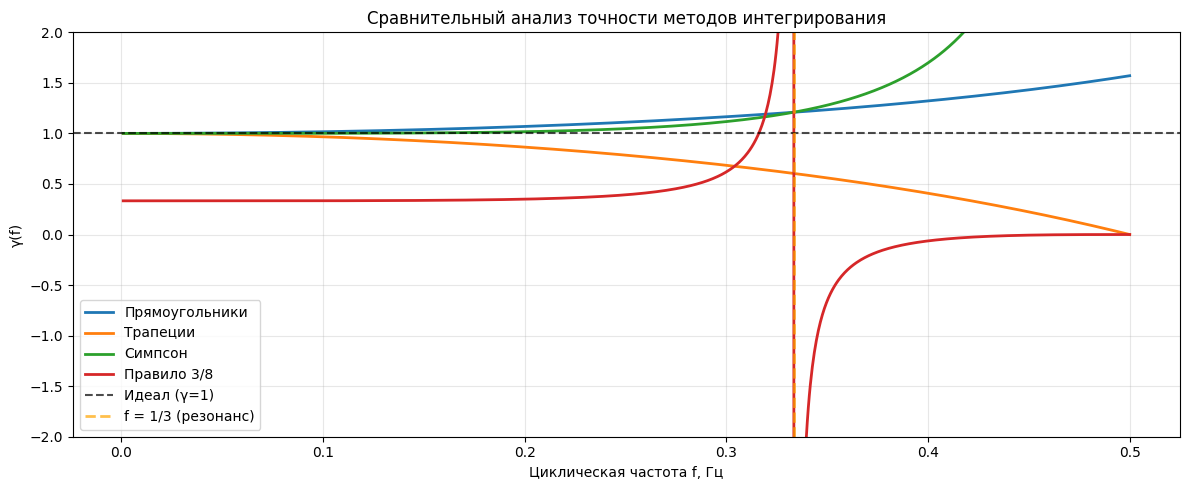

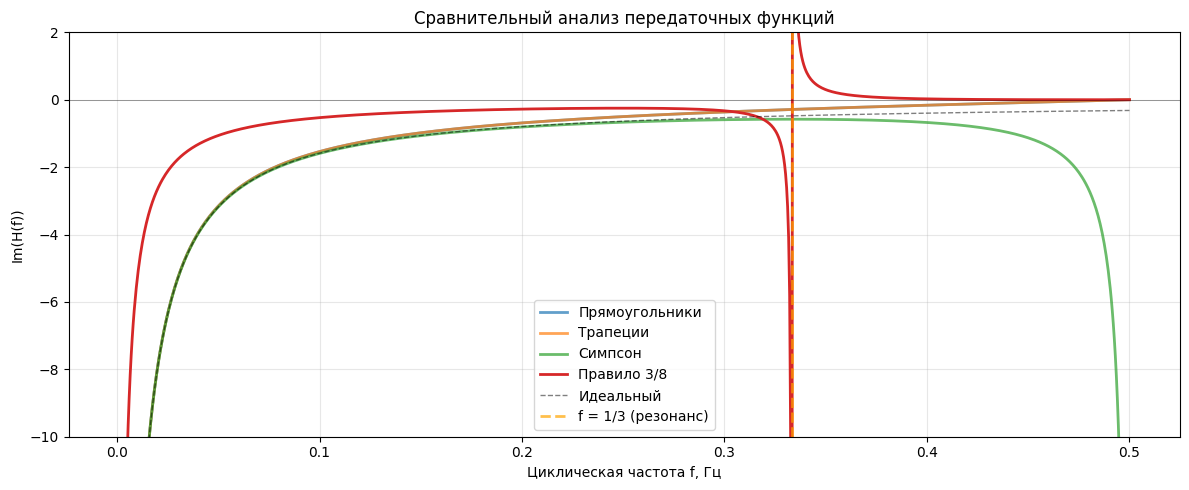

In [14]:
plt.figure(figsize=(12, 5))

plt.plot(f_freq, gamma_rect, label='Прямоугольники', linewidth=2)
plt.plot(f_freq, gamma_trap, label='Трапеции', linewidth=2)
plt.plot(f_freq, gamma_simp, label='Симпсон', linewidth=2)
plt.plot(f_freq, gamma_38, label='Правило 3/8', linewidth=2)
plt.axhline(1, color='black', linestyle='--', label='Идеал (γ=1)', alpha=0.7)
plt.axvline(x=1/3, color='orange', linestyle='--', label='f = 1/3 (резонанс)', alpha=0.7, linewidth=2)
plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('γ(f)')
plt.title('Сравнительный анализ точности методов интегрирования')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-2, 2)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.plot(f_freq, np.imag(H_rect), label='Прямоугольники', linewidth=2, alpha=0.7)
plt.plot(f_freq, np.imag(H_trap), label='Трапеции', linewidth=2, alpha=0.7)
plt.plot(f_freq, np.imag(H_simp), label='Симпсон', linewidth=2, alpha=0.7)
plt.plot(f_freq, np.imag(H_38), label='Правило 3/8', linewidth=2)
plt.plot(f_freq, np.imag(H_ideal), 'k--', label='Идеальный', linewidth=1, alpha=0.5)
plt.axhline(0, color='black', linewidth=0.5, alpha=0.5)
plt.axvline(x=1/3, color='orange', linestyle='--', label='f = 1/3 (резонанс)', alpha=0.7, linewidth=2)
plt.xlabel('Циклическая частота f, Гц')
plt.ylabel('Im(H(f))')
plt.title('Сравнительный анализ передаточных функций')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-10, 2)

plt.tight_layout()
plt.show()

#### Выводы по сравнительному анализу

1. **Устойчивость**: Формулы прямоугольников, трапеций и Симпсона являются устойчивыми и надежными для практического применения. Правило 3/8 требует специальных мер предосторожности из-за резонансной особенности.

2. **Точность**: Формула Симпсона демонстрирует наивысшую точность в наиболее широкой полосе частот среди всех устойчивых методов.

3. **Простота реализации**: Формула прямоугольников наиболее проста в реализации, но обеспечивает наименьшую точность.

4. **Практическая рекомендация**: Для большинства приложений рекомендуется использование формулы трапеций (хороший компромисс) или формулы Симпсона (высокая точность). Правило 3/8 следует использовать с осторожностью и только при специальных требованиях.

## Выводы

В ходе выполнения лабораторной работы был проведен частотный анализ формул численного интегрирования. Были получены аналитические выражения для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций, Симпсона и правила 3/8.

На основе выведенных формул построены графики передаточных функций и отношений вычисляемых значений к истинным, что позволило провести детальный анализ частотных свойств каждого метода. Сравнительный анализ показал, что:

- Все методы демонстрируют характеристику интеграторов нижних частот с бесконечным усилением на нулевой частоте
- Формула Симпсона обеспечивает наивысшую точность в наиболее широкой полосе частот
- Правило 3/8 обладает резонансной особенностью, ограничивающей его практическое применение
- Формулы прямоугольников, трапеций и Симпсона являются устойчивыми и надежными для использования

Проведенное исследование позволяет рекомендовать формулу Симпсона для высокоточных вычислений и формулу трапеций как оптимальный компромисс между точностью и простотой реализации в практических приложениях цифровой обработки сигналов.